In [7]:
%pylab

Using matplotlib backend: <object object at 0x0000016833D632E0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import functions
import algorithms
import optSolver_Woo_Seonho as optSolver
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\Users\Seonho Woo\Downloads\python codes\algorithms.py:189: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(s) is not 0:


In [9]:
## The correct way to call a certain function in functions.py is as follows
x0 = np.array([1.2,1.2])
functions.rosen_func(x0)

5.8

In [10]:
## Define three class objects required in 'optSolver' and their attributes 
class Problem:
    def __init__(self, name, x0, n, compute_f, compute_g, compute_H):
        self.name = name
        self.x0 = x0
        self.n = n
        self.compute_f = compute_f
        self.compute_g = compute_g
        self.compute_H = compute_H
        
class Method:
    def __init__(self,name,step_type,constant_step_size):
        self.name = name
        self.step_type = step_type
        self.constant_step_size = constant_step_size
        
class Options:
    def __init__(self,term_tol = 1e-6, max_iterations = 1e3):
        self.term_tol = term_tol
        self.max_iterations = max_iterations  

In [12]:
## Implement the algorithm on a problem 
#x,f,xk,fk = optSolver.optSolver_Woo_Seonho(problem,method,options)

#### 1. Rosenbrock problem

a) Gradient Descent with backtracking line search \
b) Newton's Methods with backtracking line search and modification \
c) BFGS with skip conditions \
d) L-BFGS with certain memory lengths (i. m=2, ii. m=5, iii. m=10) and skip condition 

In [89]:
def Rosenbrock(method):
    # Initialization of parameters and function
    x0_1 = np.array([1.2,1.2])
    x0_2 = np.array([-1.2,1])
    x_star = np.array([1,1])
    f_star = functions.rosen_func(x_star)
    # Declare Rosenbrock Problem to problem
    options = Options(1e-6,1e3)
    problem1 = Problem('Rosenbrock',x0_1,len(x0_1),functions.rosen_func,functions.rosen_grad,functions.rosen_Hess)
    problem2 = Problem('Rosenbrock',x0_2,len(x0_2),functions.rosen_func,functions.rosen_grad,functions.rosen_Hess)
    x1, f1, xk1, fk1, k1, count1 = optSolver.optSolver_Woo_Seonho(problem1, method, options)
    x2, f2, xk2, fk2, k2, count2 = optSolver.optSolver_Woo_Seonho(problem2, method, options)
    print("x = ", x1, "\nf = ", f1, "\n# iterations 1: ", k1+1, "\ncount = ", count1)
    print("x = ", x2, "\nf = ", f2, "\n# iterations 2: ", k2+1, "\ncount = ", count2)
    log_diff1 = list(np.log(fk1 - f_star)) ; log_diff2 = list(np.log(fk2 - f_star))
    plt.plot(list(np.arange(0, k1+1)), log_diff1, label = "x0 = [1.2, 1.2]T")
    plt.plot(list(np.arange(0, k2+1)), log_diff2, label = "x0 = [-1.2, 1.0]T")
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k)-f*)')
    methodname = method.name
    methodstep = method.step_type
    plt.title(methodname+" "+methodstep+" - Rosenbrock Problem")
    plt.legend()
    plt.savefig(methodname+'_rosen.png')
    plt.show()
    

x =  [1.0127633  1.02536825] 
f =  0.00017322276919479591 
# iterations 1:  1001 
count =  0
x =  [0.97277594 0.9460233 ] 
f =  0.0007484247354820104 
# iterations 2:  1001 
count =  0


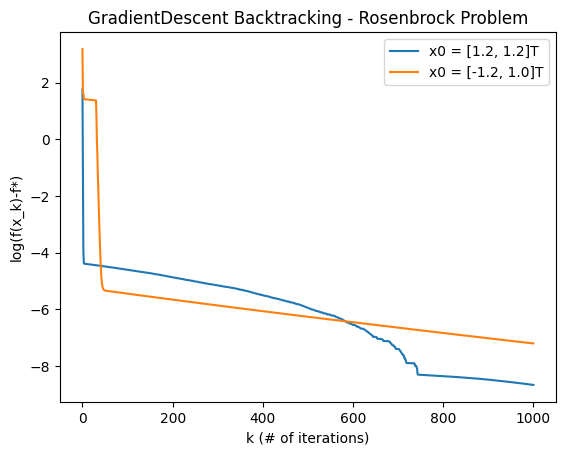

In [90]:
# 1.a - Gradient Descent with backtracking line search
Rosenbrock(Method('GradientDescent','Backtracking',1e-4))

x =  [1.00000018 1.00000035] 
f =  3.226676189013061e-14 
# iterations 1:  8 
count =  0
x =  [0.99999889 0.99999751] 
f =  8.51707497285869e-12 
# iterations 2:  21 
count =  0


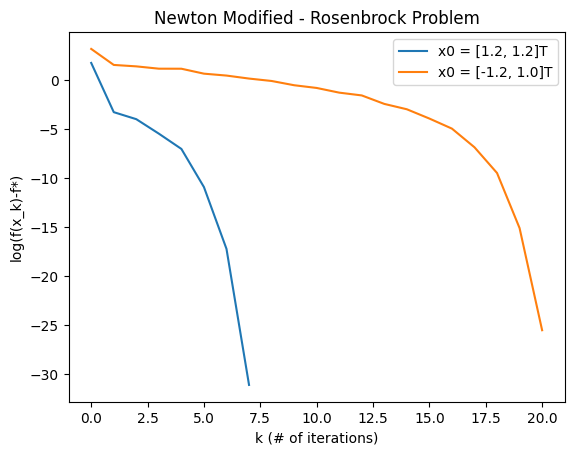

In [91]:
# 1.b - Newton's Methods with backtracking line search and modification
Rosenbrock(Method('Newton','Modified',1e-4))

x =  [1.0560968 1.1152119] 
f =  0.0031485041455273114 
# iterations 1:  1001 
count =  0
x =  [1.32340887 1.75077974] 
f =  0.1046331507832483 
# iterations 2:  1001 
count =  0


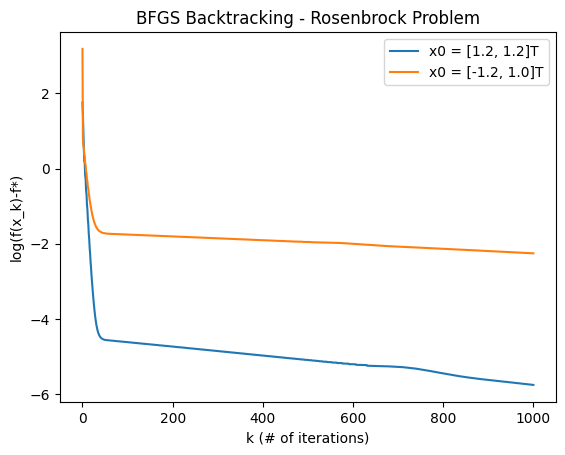

In [92]:
# 1.c - BFGS with skip conditions
Rosenbrock(Method('BFGS','Backtracking',1e-4))

x =  [1.0127633  1.02536825] 
f =  0.00017322276919479591 
# iterations 1:  1001 
count =  0
x =  [0.97277594 0.9460233 ] 
f =  0.0007484247354820104 
# iterations 2:  1001 
count =  0


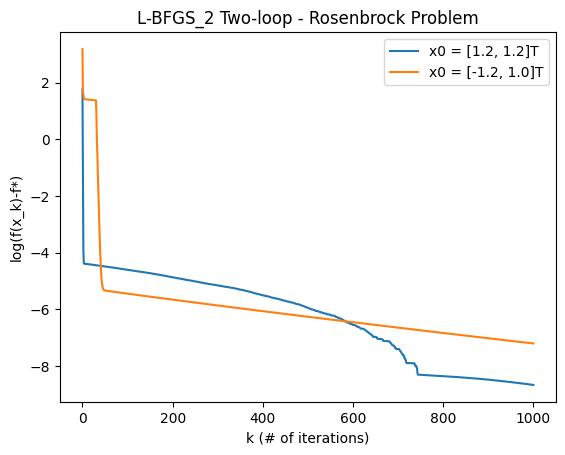

In [93]:
# 1.d.i - L-BFGS with memory length of 2 and skip condition
Rosenbrock(Method('L-BFGS_2','Two-loop',1e-4))

x =  [1.0127633  1.02536825] 
f =  0.00017322276919479591 
# iterations 1:  1001 
count =  0
x =  [0.97277594 0.9460233 ] 
f =  0.0007484247354820104 
# iterations 2:  1001 
count =  0


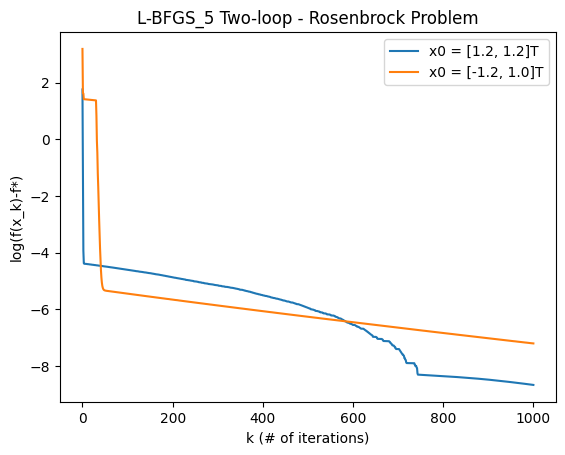

In [94]:
# 1.d.ii - L-BFGS with memory length of 5 and skip condition
Rosenbrock(Method('L-BFGS_5','Two-loop',1e-4))

x =  [1.0127633  1.02536825] 
f =  0.00017322276919479591 
# iterations 1:  1001 
count =  0
x =  [0.97277594 0.9460233 ] 
f =  0.0007484247354820104 
# iterations 2:  1001 
count =  0


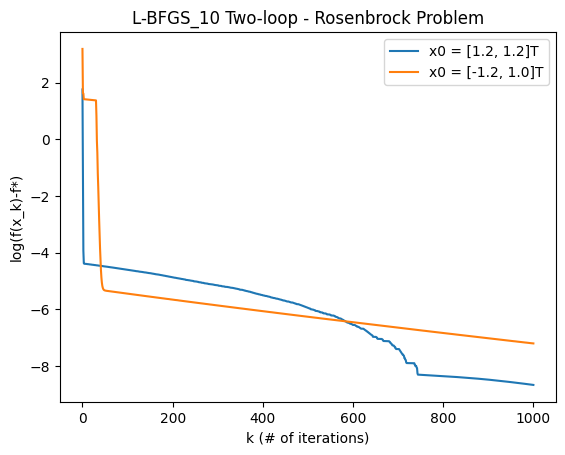

In [95]:
# 1.d.iii - L-BFGS with memory length of 10 and skip condition
Rosenbrock(Method('L-BFGS_10','Two-loop',1e-4))

#### Trials - Rosen

In [20]:
def convg_plot(methodname, xk1, fk1, xk2, fk2, start1 = "x0 = [1.2, 1.2]T", start2 = "x0 = [-1.2, 1]T"):
    x = list(np.arange(0, max(len(xk1), len(xk2))))
    x1 = list(np.arange(0, len(xk1)))
    x2 = list(np.arange(0, len(xk2)))
    plt.figure(figsize=(5,3))
    plt.plot(x1, fk1, label = start1)
    plt.plot(x2, fk2, label = start2)
    plt.xlabel('k (# of iterations)')
    plt.ylabel('f_k')
    plt.title(methodname)
    plt.legend()
    plt.show()

#### 2. Function 2 problem
a) Gradient Descent with backtracking line search \
b) Newton's Methods with backtracking line search and modification \
c) BFGS with skip conditions \
d) L-BFGS with certain memory lengths and skip condition 

In [75]:
def Function2(method):
    x0 = np.array([1.0,1.0]) ; options = Options(1e-6,1e3)
    problem = Problem('Function2',x0,len(x0),functions.func2_func,functions.func2_grad,functions.func2_Hess)
    x, f, xk, fk, k, count = optSolver.optSolver_Woo_Seonho(problem, method, options)
    print("x = ", x, "\nf = ", f)#, "\ncount = ", count)
    log_diff = list(np.log(fk))
    plt.plot(list(np.arange(0, k+1)), log_diff)
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k))')
    methodname = method.name
    methodstep = method.step_type
    plt.title(methodname+" "+methodstep+" - Function 2 Problem")
    plt.legend()
    plt.savefig(methodname+'_func2.png')
    plt.show()
    
    return xk, fk, k, count
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99992093 0.49997988] 
f =  1.0069463050789388e-09


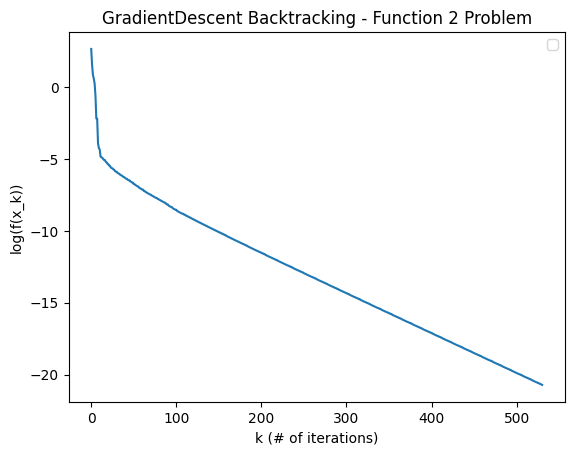

([array([1., 1.]),
  array([ 1.      , -0.734375]),
  array([3.13350264, 0.1397068 ]),
  array([2.84180681, 0.70952617]),
  array([2.91215742, 0.16416592]),
  array([2.70944005, 0.58202205]),
  array([2.76055238, 0.35203274]),
  array([2.71691123, 0.49453424]),
  array([2.74324465, 0.41035453]),
  array([2.74143479, 0.42873606]),
  array([2.8056327 , 0.42997044]),
  array([2.80265183, 0.44882993]),
  array([2.80937411, 0.4447104 ]),
  array([2.81197921, 0.45389917]),
  array([2.81592938, 0.44913732]),
  array([2.82389684, 0.45648795]),
  array([2.8308571, 0.4487051]),
  array([2.83105967, 0.45583372]),
  array([2.84101595, 0.45251535]),
  array([2.84133833, 0.45869021]),
  array([2.85053846, 0.45555168]),
  array([2.8508127 , 0.46139254]),
  array([2.85945204, 0.45800384]),
  array([2.85956391, 0.46395404]),
  array([2.86368748, 0.46194455]),
  array([2.86559952, 0.46742458]),
  array([2.86816268, 0.46424033]),
  array([2.87310608, 0.47022135]),
  array([2.87580025, 0.46610969]),
  arr

In [76]:
# 1.a - Gradient Descent with backtracking line search
Function2(Method('GradientDescent','Backtracking',1e-4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99999994 0.5       ] 
f =  3.3978924862586816e-15


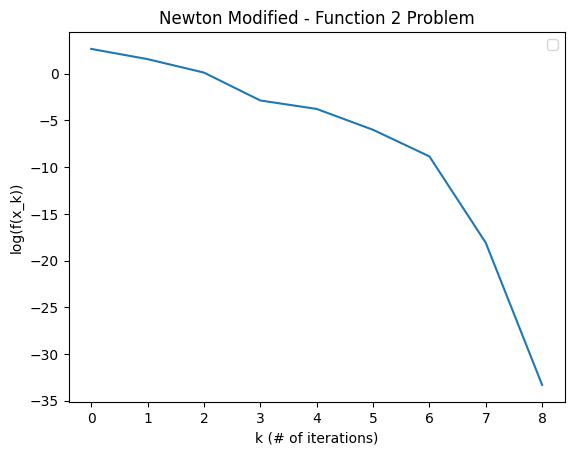

([array([1., 1.]),
  array([ 1.      , -0.734375]),
  array([2.07786335, 0.46795431]),
  array([2.77435815, 0.38403035]),
  array([3.16891294, 0.56431741]),
  array([3.12599376, 0.53270516]),
  array([2.99009564, 0.49989346]),
  array([2.99972108, 0.49992321]),
  array([2.99999994, 0.5       ])],
 [14.203125,
  4.766859851326444,
  1.126626876324762,
  0.05697866351279374,
  0.0230439299644178,
  0.002471566342101728,
  0.00014304023504993374,
  1.3795115209085584e-08,
  3.3978924862586816e-15],
 8,
 0)

In [77]:
# 1.b - Newton's Methods with backtracking line search and modification
Function2(Method('Newton','Modified',1e-4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.9999802  0.49999565] 
f =  7.01357005833707e-11


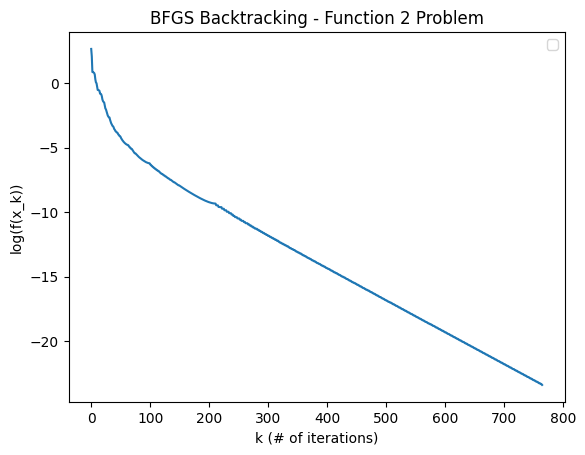

([array([1., 1.]),
  array([ 1.       , -1.2135188]),
  array([-0.3662329 ,  2.09614337]),
  array([-0.39828732,  2.09841517]),
  array([ 1.54830588, -0.39294535]),
  array([2.19205557, 0.62287008]),
  array([ 2.39104673, -0.20577353]),
  array([2.06480327, 0.49517864]),
  array([ 2.29858396, -0.07764516]),
  array([2.1133142 , 0.46213786]),
  array([2.32183041e+00, 8.19585583e-04]),
  array([2.19317235, 0.41748808]),
  array([2.37761365, 0.06825583]),
  array([2.2606595 , 0.44692242]),
  array([2.42123267, 0.09240152]),
  array([2.3076264 , 0.43577924]),
  array([2.44902159, 0.1341554 ]),
  array([2.3489814 , 0.44875272]),
  array([2.47188163, 0.16685151]),
  array([2.39192568, 0.42833641]),
  array([2.4933252 , 0.21583991]),
  array([2.436071  , 0.43158694]),
  array([2.52756038, 0.23523446]),
  array([2.47450441, 0.42722634]),
  array([2.5455389 , 0.27859574]),
  array([2.51340588, 0.42464015]),
  array([2.57379816, 0.30136239]),
  array([2.54912345, 0.41935175]),
  array([2.5980801

In [78]:
# 1.c - BFGS with skip conditions
Function2(Method('BFGS','Backtracking',1e-4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99992093 0.49997988] 
f =  1.0069463050789388e-09


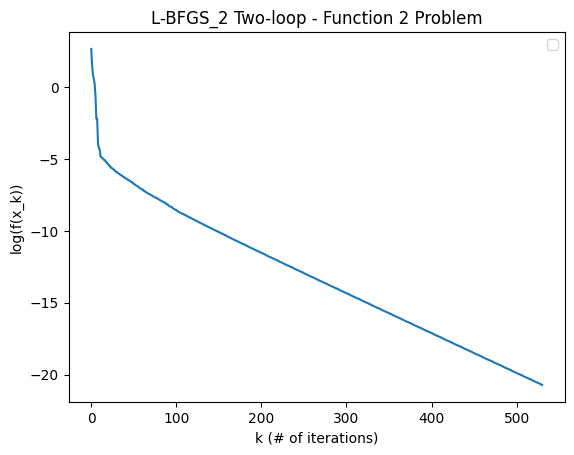

([array([1., 1.]),
  array([ 1.      , -0.734375]),
  array([3.13350264, 0.1397068 ]),
  array([2.84180681, 0.70952617]),
  array([2.91215742, 0.16416592]),
  array([2.70944005, 0.58202205]),
  array([2.76055238, 0.35203274]),
  array([2.71691123, 0.49453424]),
  array([2.74324465, 0.41035453]),
  array([2.74143479, 0.42873606]),
  array([2.8056327 , 0.42997044]),
  array([2.80265183, 0.44882993]),
  array([2.80937411, 0.4447104 ]),
  array([2.81197921, 0.45389917]),
  array([2.81592938, 0.44913732]),
  array([2.82389684, 0.45648795]),
  array([2.8308571, 0.4487051]),
  array([2.83105967, 0.45583372]),
  array([2.84101595, 0.45251535]),
  array([2.84133833, 0.45869021]),
  array([2.85053846, 0.45555168]),
  array([2.8508127 , 0.46139254]),
  array([2.85945204, 0.45800384]),
  array([2.85956391, 0.46395404]),
  array([2.86368748, 0.46194455]),
  array([2.86559952, 0.46742458]),
  array([2.86816268, 0.46424033]),
  array([2.87310608, 0.47022135]),
  array([2.87580025, 0.46610969]),
  arr

In [79]:
# 1.d.i - L-BFGS with memory length of 2 and skip condition
Function2(Method('L-BFGS_2','Two-loop',1e-4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99992093 0.49997988] 
f =  1.0069463050789388e-09


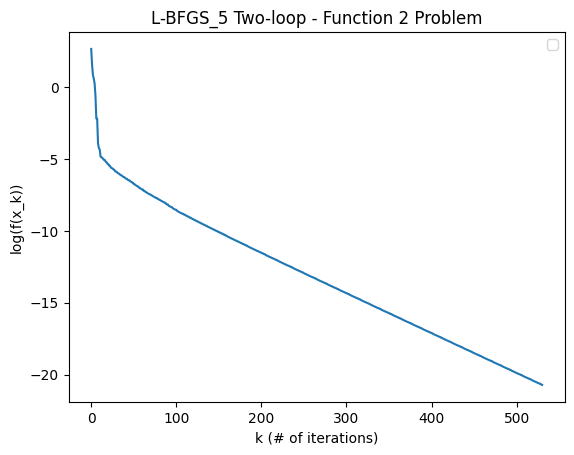

([array([1., 1.]),
  array([ 1.      , -0.734375]),
  array([3.13350264, 0.1397068 ]),
  array([2.84180681, 0.70952617]),
  array([2.91215742, 0.16416592]),
  array([2.70944005, 0.58202205]),
  array([2.76055238, 0.35203274]),
  array([2.71691123, 0.49453424]),
  array([2.74324465, 0.41035453]),
  array([2.74143479, 0.42873606]),
  array([2.8056327 , 0.42997044]),
  array([2.80265183, 0.44882993]),
  array([2.80937411, 0.4447104 ]),
  array([2.81197921, 0.45389917]),
  array([2.81592938, 0.44913732]),
  array([2.82389684, 0.45648795]),
  array([2.8308571, 0.4487051]),
  array([2.83105967, 0.45583372]),
  array([2.84101595, 0.45251535]),
  array([2.84133833, 0.45869021]),
  array([2.85053846, 0.45555168]),
  array([2.8508127 , 0.46139254]),
  array([2.85945204, 0.45800384]),
  array([2.85956391, 0.46395404]),
  array([2.86368748, 0.46194455]),
  array([2.86559952, 0.46742458]),
  array([2.86816268, 0.46424033]),
  array([2.87310608, 0.47022135]),
  array([2.87580025, 0.46610969]),
  arr

In [80]:
# 1.d.ii - L-BFGS with memory length of 5 and skip condition
Function2(Method('L-BFGS_5','Two-loop',1e-4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x =  [2.99992093 0.49997988] 
f =  1.0069463050789388e-09


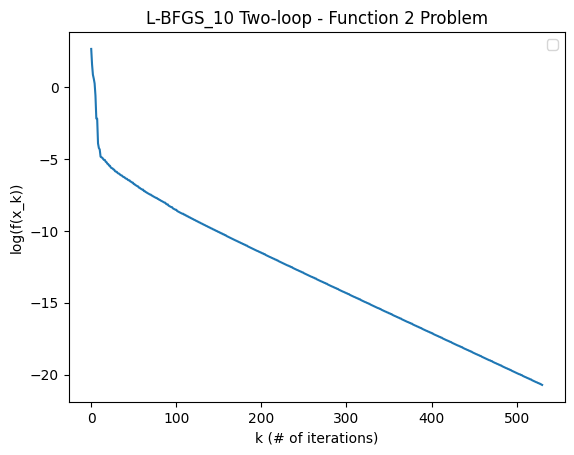

([array([1., 1.]),
  array([ 1.      , -0.734375]),
  array([3.13350264, 0.1397068 ]),
  array([2.84180681, 0.70952617]),
  array([2.91215742, 0.16416592]),
  array([2.70944005, 0.58202205]),
  array([2.76055238, 0.35203274]),
  array([2.71691123, 0.49453424]),
  array([2.74324465, 0.41035453]),
  array([2.74143479, 0.42873606]),
  array([2.8056327 , 0.42997044]),
  array([2.80265183, 0.44882993]),
  array([2.80937411, 0.4447104 ]),
  array([2.81197921, 0.45389917]),
  array([2.81592938, 0.44913732]),
  array([2.82389684, 0.45648795]),
  array([2.8308571, 0.4487051]),
  array([2.83105967, 0.45583372]),
  array([2.84101595, 0.45251535]),
  array([2.84133833, 0.45869021]),
  array([2.85053846, 0.45555168]),
  array([2.8508127 , 0.46139254]),
  array([2.85945204, 0.45800384]),
  array([2.85956391, 0.46395404]),
  array([2.86368748, 0.46194455]),
  array([2.86559952, 0.46742458]),
  array([2.86816268, 0.46424033]),
  array([2.87310608, 0.47022135]),
  array([2.87580025, 0.46610969]),
  arr

In [81]:
# 1.d.iii - L-BFGS with memory length of 10 and skip condition
Function2(Method('L-BFGS_10','Two-loop',1e-4))

#### 3. Function 3 problem
a) Gradient Descent with backtracking line search \
b) Newton's Methods with backtracking line search and modification \
c) BFGS with skip conditions \
d) L-BFGS with certain memory lengths and skip condition 

In [96]:
def Function3(method):
    # Initialization of parameters and function
    n = [2, 10, 100, 1000]
    x0_1 = np.zeros(n[0]); x0_2 = np.zeros(n[1]); x0_3 = np.zeros(n[2]) ; x0_4 = np.zeros(n[3])
    x0_1[0] = 1; x0_2[0] = 1; x0_3[0] = 1 ; x0_4[0] = 1
    options = Options(1e-6,1e3)
    # Declare Function 3 Problem to problem
    problem1 = Problem('Function3',x0_1,len(x0_1),functions.func3_func,functions.func3_grad,functions.func3_Hess)
    problem2 = Problem('Function3',x0_2,len(x0_2),functions.func3_func,functions.func3_grad,functions.func3_Hess)
    problem3 = Problem('Function3',x0_3,len(x0_3),functions.func3_func,functions.func3_grad,functions.func3_Hess)
    problem4 = Problem('Function3',x0_4,len(x0_4),functions.func3_func,functions.func3_grad,functions.func3_Hess)
    x1, f1, xk1, fk1, k1, count1 = optSolver.optSolver_Woo_Seonho(problem1, method, options)
    x2, f2, xk2, fk2, k2, count2 = optSolver.optSolver_Woo_Seonho(problem2, method, options)
    x3, f3, xk3, fk3, k3, count3 = optSolver.optSolver_Woo_Seonho(problem3, method, options)
    x4, f4, xk4, fk4, k4, count4 = optSolver.optSolver_Woo_Seonho(problem4, method, options)
    print("x1 = ", x1, "\nf1 = ", f1, "\nskipped iterations 1: ", count1)
    print("x2 = ", x2, "\nf2 = ", f2, "\nskipped iterations 2: ", count2)
    print("x3 = ", x3, "\nf3 = ", f3, "\nskipped iterations 3: ", count3)
    print("x4 = ", x4, "\nf4 = ", f4, "\nskipped iterations 3: ", count4)
    log1 = list(np.log(fk1)); log2 = list(np.log(fk2)) ; log3 = list(np.log(fk3)); log4 = list(np.log(fk4))
    plt.plot(list(np.arange(0,len(fk1))), log1, label = "n = 2")
    plt.plot(list(np.arange(0,len(fk2))), log2, label = "n = 10")
    plt.plot(list(np.arange(0,len(fk3))), log3, label = "n = 100")
    plt.plot(list(np.arange(0,len(fk4))), log4, label = "n = 1000")
    plt.xlabel('k (# of iterations)')
    plt.ylabel('log(f(x_k))')
    methodname = method.name
    methodstep = method.step_type
    plt.title(methodname+" "+methodstep+" - Function 3 Problem")
    plt.legend()
    plt.savefig(methodname+'_func3.png')
    plt.show()
    plt.show()

x1 =  [-1.24476337  1.        ] 
f1 =  -0.2055728089884078 
skipped iterations 1:  0
x2 =  [-1.24476485  1.          1.          1.          1.          1.
  1.          1.          1.          1.        ] 
f2 =  -0.2055728089930578 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.    

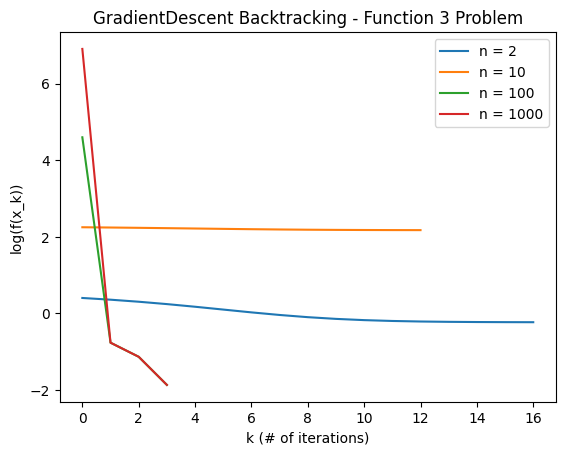

In [97]:
# 1.a - Gradient Descent with backtracking line search
Function3(Method('GradientDescent','Backtracking',1e-4))


x1 =  [-1.24476995  0.99261379] 
f1 =  -0.20557280602372063 
skipped iterations 1:  0
x2 =  [-1.24476995  0.99261379  0.99261379  0.99261379  0.99261379  0.99261379
  0.99261379  0.99261379  0.99261379  0.99261379] 
f2 =  -0.20557278221281405 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.      

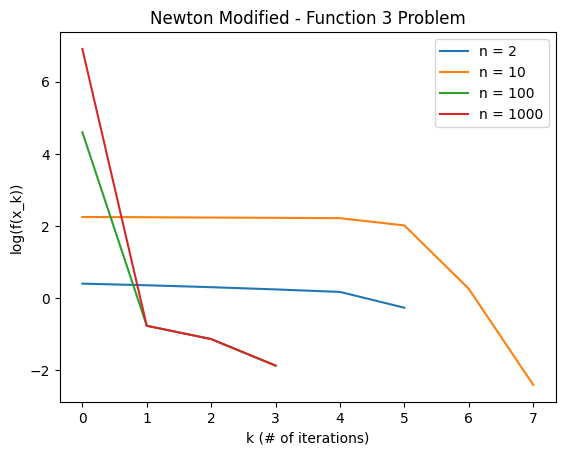

In [98]:
# 1.b - Newton's Methods with backtracking line search and modification
Function3(Method('Newton','Modified',1e-4))

In [99]:
# 1.c - BFGS with skip conditions
Function3(Method('BFGS','Backtracking',1e-4))

x1 =  [-1.24476337  1.        ] 
f1 =  -0.2055728089884078 
skipped iterations 1:  0
x2 =  [-1.24476485  1.          1.          1.          1.          1.
  1.          1.          1.          1.        ] 
f2 =  -0.2055728089930578 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.    

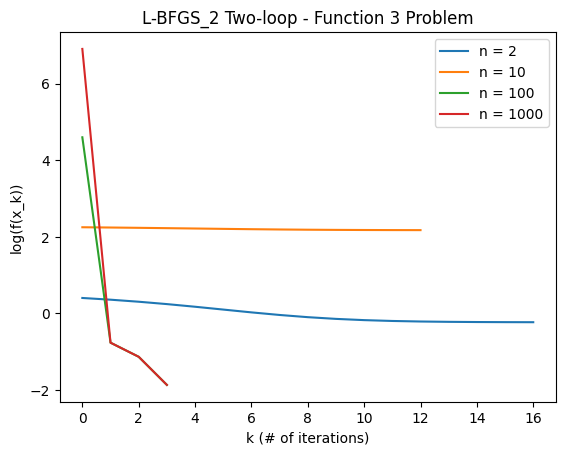

In [ ]:
# 1.d.i - L-BFGS with memory length of 2 and skip condition
Function3(Method('L-BFGS_2','Two-loop',1e-4))

x1 =  [-1.24476337  1.        ] 
f1 =  -0.2055728089884078 
skipped iterations 1:  0
x2 =  [-1.24476485  1.          1.          1.          1.          1.
  1.          1.          1.          1.        ] 
f2 =  -0.2055728089930578 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.    

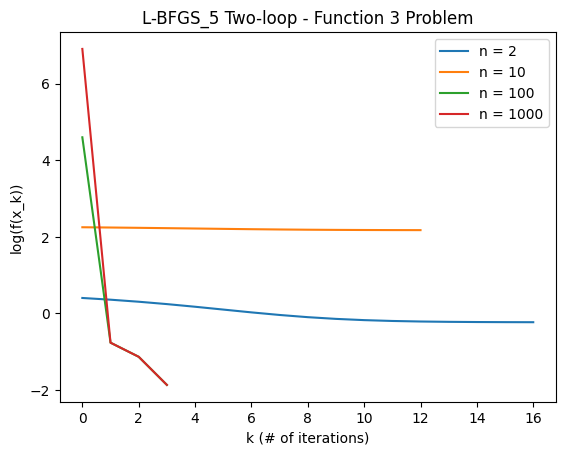

In [ ]:
# 1.d.ii - L-BFGS with memory length of 5 and skip condition
Function3(Method('L-BFGS_5','Two-loop',1e-4))

x1 =  [-1.24476337  1.        ] 
f1 =  -0.2055728089884078 
skipped iterations 1:  0
x2 =  [-1.24476485  1.          1.          1.          1.          1.
  1.          1.          1.          1.        ] 
f2 =  -0.2055728089930578 
skipped iterations 2:  0
x3 =  [-1.24476594  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.    

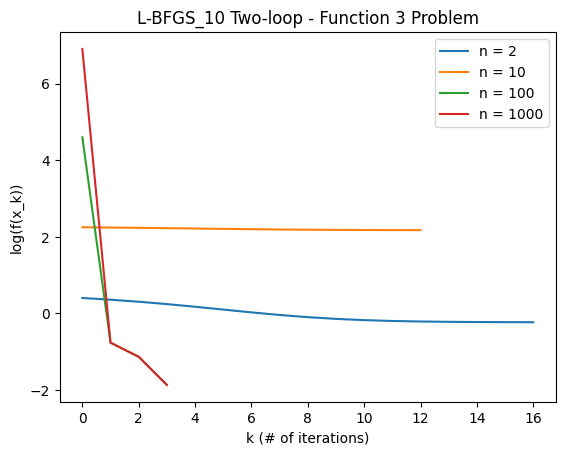

In [ ]:
# 1.d.iii - L-BFGS with memory length of 10 and skip condition
Function3(Method('L-BFGS_10','Two-loop',1e-4))